In [13]:
import pandas as pd
import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt
from config import connection

from sqlalchemy import create_engine

engine = create_engine(connection).connect()


In [14]:
#getting the 2 tables
employees = pd.read_sql("SELECT * FROM employees", engine)
employees #for quality checks

salaries = pd.read_sql("SELECT * FROM salaries", engine)
salaries #for quality checks

#merge the 2 table into one which shows all details including salary
emp_sal = pd.merge(employees, salaries, on='emp_no', how ='right')
emp_sal.rename(columns={'emp_title':'title_id'}, inplace= True)

#get in the title table
title = pd.read_sql("SELECT * FROM titles", engine)

#group average (mean) salary by title_id
average_sal = pd.DataFrame({'Average Salary' : emp_sal.groupby(['title_id'])['salary'].mean()})
average_sal.rename(columns={'emp_title' : 'title_id'}, inplace = True)
average_sal = pd.merge(title, average_sal, on='title_id', how='left').drop(columns=['title_id'])


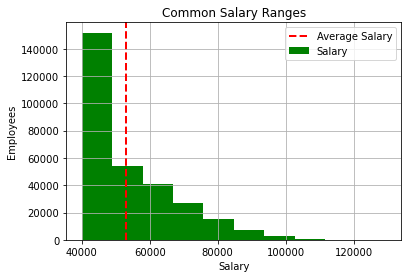

In [15]:
#time to visualize the data

#to create a histogram to visualize the most common salary ranges for employees
plt.hist(emp_sal['salary'], density=False, label='Salary', color = 'green')
plt.xlabel('Salary')
plt.ylabel('Employees')
plt.title('Common Salary Ranges')
plt.axvline(emp_sal['salary'].mean(), color='red', linestyle='dashed', linewidth=2, label='Average Salary')
plt.legend()
plt.grid()
plt.savefig("common_salary_ranges.png", dpi = 300)

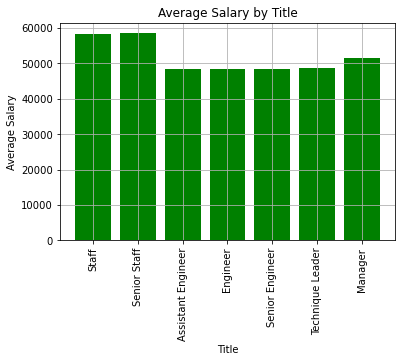

In [16]:
x = average_sal['title']
y = round(average_sal['Average Salary'], 2)

plt.bar(x, y, color='green')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Title')
plt.grid()
plt.savefig('average_salary_tite.png', dpi = 300)

In [17]:
myquery = "SELECT * FROM employees as e WHERE e.emp_no = '499942'"
myid = pd.read_sql(myquery, engine)
myid #oh boss you funny man

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997
